# Binary Classification Model for Bank Marketing Using Python
## Take 2, version 01.0
### David Lowe
### May 8, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery (http://machinelearningmastery.com/)

Dataset Used: Bank Marketing Dataset

Dataset ML Model: Binary classification with numerical and categorical attributes

Dataset Reference: http://archive.ics.uci.edu/ml/datasets/bank+marketing

One source of potential performance benchmarks: https://www.kaggle.com/rouseguy/bankbalanced

INTRODUCTION: The Bank Marketing dataset involves predicting the whether the bank clients will subscribe (yes/no) a term deposit (target variable). It is a binary (2-class) classification problem. There are over 45,000 observations with 16 input variables and 1 output variable. There are no missing values in the dataset.

CONCLUSION: The take No.2 version of this banking dataset aims to test the removal of one attribute from the dataset and the effect. You can see the results from the take No.1 here on the website: https://daines-analytics.com/wp-content/uploads/2018/04/py-classification-Bank_Marketing_Take1.html.

The data removed was the “duration” attribute. According to the dataset documentation, this attribute highly affects the output target (e.g., if duration=0 then y="no"). However, the duration is not known before a call is performed. Also, after the end of the call, the target variable is naturally identified. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

The baseline performance of the ten algorithms achieved an average accuracy of 87.68% (vs. 89.13% from the take No.1). Three algorithms (Linear Regression, AdaBoost, and Stochastic Gradient Boosting) achieved the top accuracy and Kappa scores during the initial modeling round. After a series of tuning trials with these three algorithms, Stochastic Gradient Boosting (SGB) achieve the top result using the training data. It produced an average accuracy of 89.49% (vs. 91.00% from the take No.1) using the training data.

SGB also processed the validation dataset with an accuracy of 89.21% (vs. 90.58% from the take No.1). For this project, the Stochastic Gradient Boosting ensemble algorithm yielded consistently top-notch training and validation results, which warrant the additional processing required by the algorithm. The elimination of the “duration” attribute did not seem to have a substantial adverse effect on the overall accuracy of the prediction models.

The purpose of this project is to analyze predictions using various machine learning algorithms and to document the steps using a template. Working through machine learning problems from end-to-end requires a structured modeling approach. Working problems through a project template can also encourage us to think about the problem more critically, to challenge our assumptions, and to get proficient at all parts of a modeling project.

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem

### 1.a) Load ibraries

In [1]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas import get_dummies
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

inputFile = 'bank-full.csv'
entireDataset = read_csv(inputFile, sep=';')
entireDataset = entireDataset.rename(columns={'y': 'targetVar'})

# Dropping the duration column to prevent future from leaking into the present
entireDataset = entireDataset.drop('duration', 1)

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [3]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [4]:
print(entireDataset.head(20))

    age           job   marital  education default  balance housing loan  \
0    58    management   married   tertiary      no     2143     yes   no   
1    44    technician    single  secondary      no       29     yes   no   
2    33  entrepreneur   married  secondary      no        2     yes  yes   
3    47   blue-collar   married    unknown      no     1506     yes   no   
4    33       unknown    single    unknown      no        1      no   no   
5    35    management   married   tertiary      no      231     yes   no   
6    28    management    single   tertiary      no      447     yes  yes   
7    42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8    58       retired   married    primary      no      121     yes   no   
9    43    technician    single  secondary      no      593     yes   no   
10   41        admin.  divorced  secondary      no      270     yes   no   
11   29        admin.    single  secondary      no      390     yes   no   
12   53    t

#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(45211, 16)


#### 2.a.iii) Types of the attributes.

In [6]:
print(entireDataset.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
campaign      int64
pdays         int64
previous      int64
poutcome     object
targetVar    object
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [7]:
print(entireDataset.describe())

                age        balance           day      campaign         pdays  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419      2.763841     40.197828   
std       10.618762    3044.765829      8.322476      3.098021    100.128746   
min       18.000000   -8019.000000      1.000000      1.000000     -1.000000   
25%       33.000000      72.000000      8.000000      1.000000     -1.000000   
50%       39.000000     448.000000     16.000000      2.000000     -1.000000   
75%       48.000000    1428.000000     21.000000      3.000000     -1.000000   
max       95.000000  102127.000000     31.000000     63.000000    871.000000   

           previous  
count  45211.000000  
mean       0.580323  
std        2.303441  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  


#### 2.a.v) Summarize the levels of the class attribute.

In [8]:
print(entireDataset.targetVar.value_counts())

no     39922
yes     5289
Name: targetVar, dtype: int64


#### 2.a.v) Count missing values.

In [9]:
print(entireDataset.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
targetVar    0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [10]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

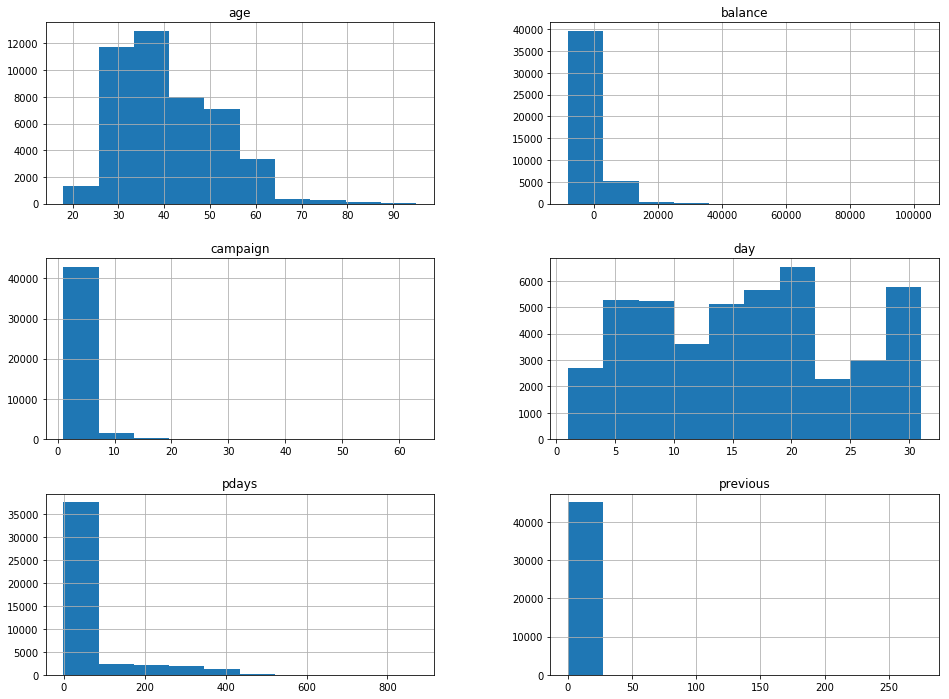

In [11]:
# Histograms for each attribute
entireDataset.hist()
pyplot.show()

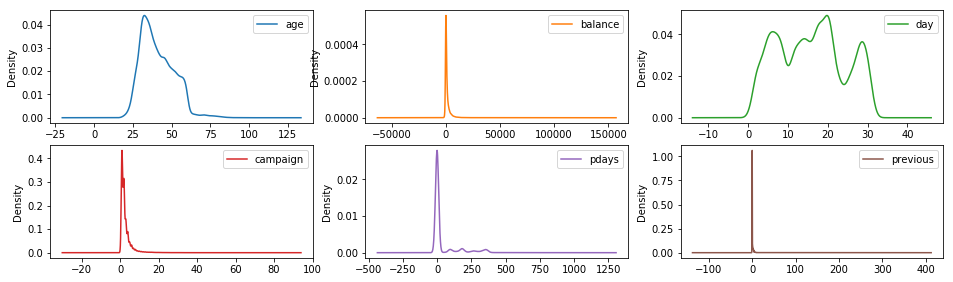

In [12]:
# Density plot for each attribute
entireDataset.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False)
pyplot.show()

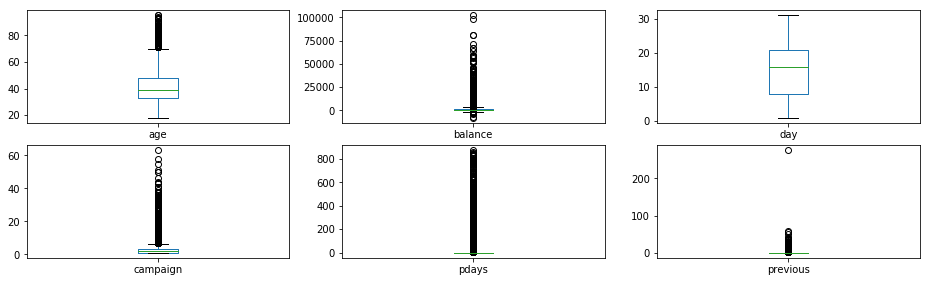

In [13]:
# Box and Whisker plot for each attribute
entireDataset.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

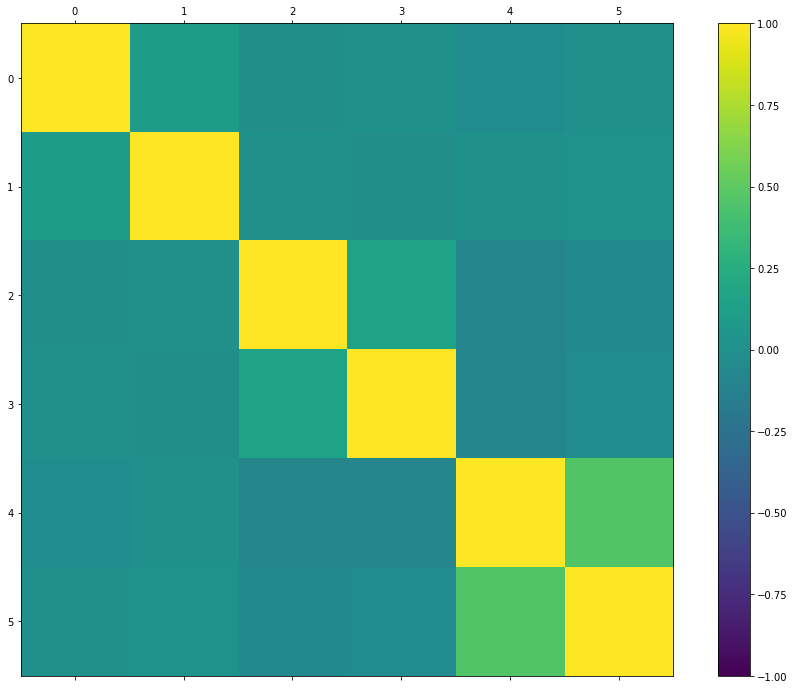

In [14]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

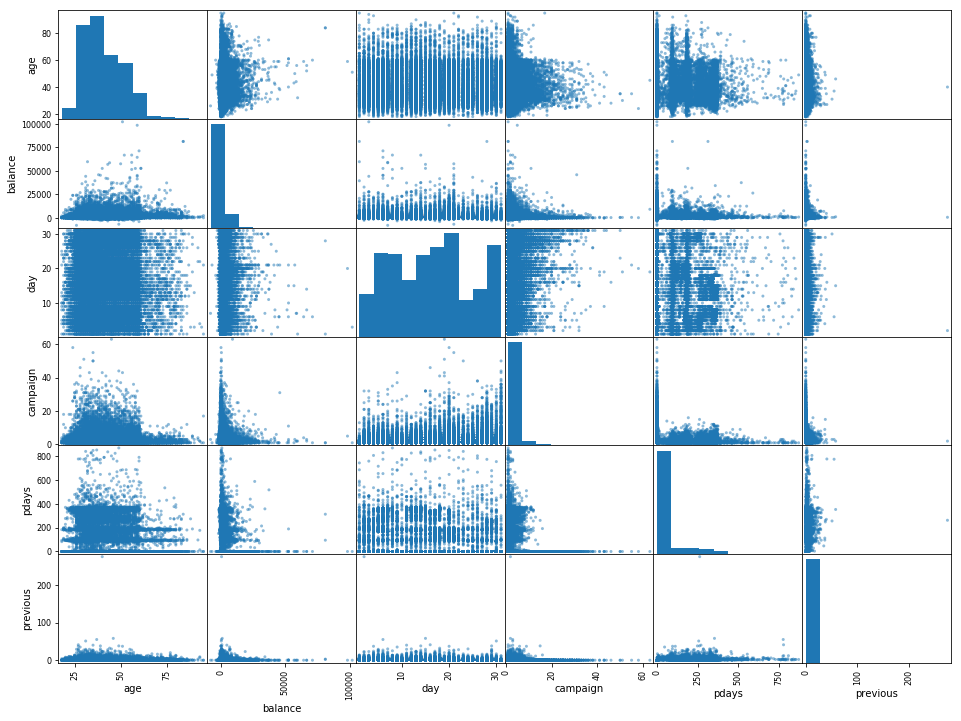

In [15]:
# Scatterplot matrix
scatter_matrix(entireDataset)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [16]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [17]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [18]:
# Conver the string variables to categorical variables as appropriate
entireDataset["job"] = entireDataset["job"].astype('category')
entireDataset["marital"] = entireDataset["marital"].astype('category')
entireDataset["education"] = entireDataset["education"].astype('category')
entireDataset["default"] = entireDataset["default"].astype('category')
entireDataset["housing"] = entireDataset["housing"].astype('category')
entireDataset["loan"] = entireDataset["loan"].astype('category')
entireDataset["contact"] = entireDataset["contact"].astype('category')
entireDataset["month"] = entireDataset["month"].astype('category')
entireDataset["poutcome"] = entireDataset["poutcome"].astype('category')
entireDataset["targetVar"] = entireDataset["targetVar"].astype('category')
print(entireDataset.dtypes)

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
campaign        int64
pdays           int64
previous        int64
poutcome     category
targetVar    category
dtype: object


In [19]:
# Apply the One-Hot-Encoding (Dummy Variables) technique
entireDataset_dummies = get_dummies(entireDataset)
print(entireDataset_dummies.dtypes)

age                    int64
balance                int64
day                    int64
campaign               int64
pdays                  int64
previous               int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
month_apr     

In [20]:
print(entireDataset_dummies.head())

   age  balance  day  campaign  pdays  previous  job_admin.  job_blue-collar  \
0   58     2143    5         1     -1         0           0                0   
1   44       29    5         1     -1         0           0                0   
2   33        2    5         1     -1         0           0                0   
3   47     1506    5         1     -1         0           0                1   
4   33        1    5         1     -1         0           0                0   

   job_entrepreneur  job_housemaid      ...        month_may  month_nov  \
0                 0              0      ...                1          0   
1                 0              0      ...                1          0   
2                 1              0      ...                1          0   
3                 0              0      ...                1          0   
4                 0              0      ...                1          0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [21]:
seedNum = 88
featuresOnly = entireDataset_dummies.loc[:, 'age':'poutcome_unknown']
X_entire = featuresOnly.values
Y_entire = entireDataset_dummies['targetVar_yes'].values
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))

X_entire.shape: (45211, 50) Y_entire.shape: (45211,)
X_train.shape: (36168, 50) Y_train.shape: (36168,)
X_validation.shape: (9043, 50) Y_validation.shape: (9043,)


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Logistic Regression

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged Decision Trees, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [22]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [23]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('BT', BaggingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
results = []
names = []

In [24]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))

LR: 0.892502 (0.006332)
Model training time: 0:00:07.481308
CART: 0.831288 (0.007154)
Model training time: 0:00:04.101030
NB: 0.837785 (0.007436)
Model training time: 0:00:00.540400
KNN: 0.877184 (0.006853)
Model training time: 0:00:04.541146
SVM: 0.884594 (0.005995)
Model training time: 0:56:44.137321
BT: 0.888410 (0.006543)
Model training time: 0:00:24.432868
RF: 0.888741 (0.005865)
Model training time: 0:00:03.981919
ET: 0.882382 (0.006527)
Model training time: 0:00:04.798691
AB: 0.892253 (0.006883)
Model training time: 0:00:16.718081
GBM: 0.893691 (0.006378)
Model training time: 0:01:05.979755


### 4.b) Spot-checking baseline algorithms

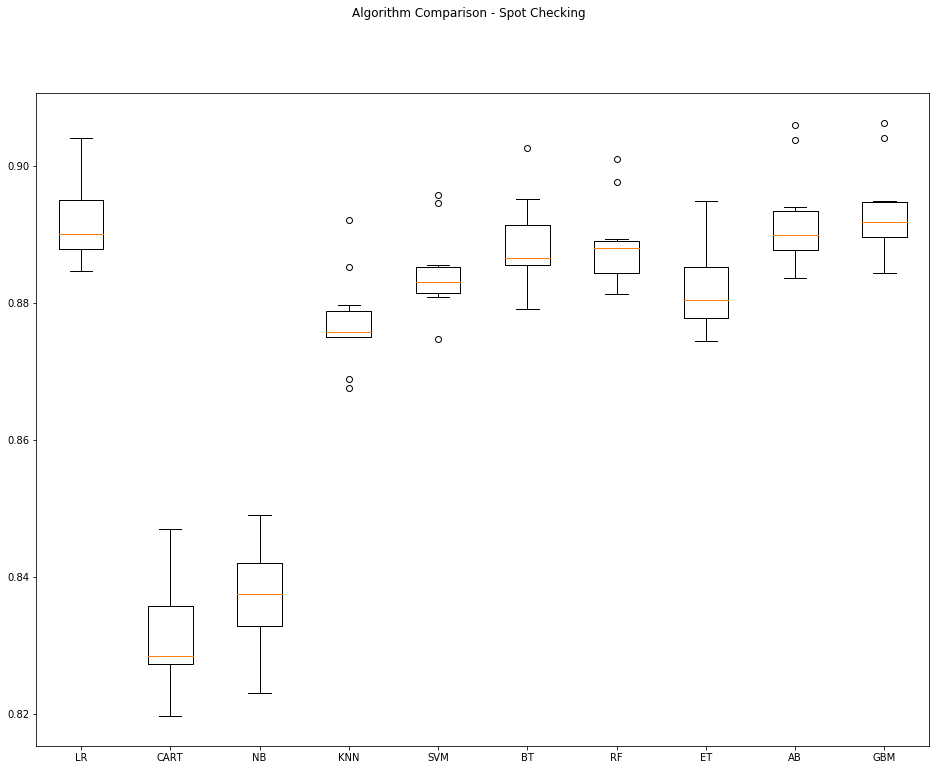

In [25]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [26]:
# Set up the comparison array
results = []
names = []

In [27]:
# Tuning algorithm #1 - Logistic Regression
startTimeModule = datetime.now()
paramGrid1 = dict(C=numpy.array([0.01,0.1,1,10,100]))
model1 = LogisticRegression(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('LR')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.892502 using {'C': 1.0}
0.892142 (0.006861) with: {'C': 0.01}
0.892474 (0.006438) with: {'C': 0.1}
0.892502 (0.006332) with: {'C': 1.0}
0.892087 (0.006204) with: {'C': 10.0}
0.892391 (0.006083) with: {'C': 100.0}
Model training time: 0:00:34.726183


In [28]:
# Tuning algorithm #2 - AdaBoost
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=numpy.array([100,200,300,400,500]))
model2 = AdaBoostClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.892640 using {'n_estimators': 400}
0.891838 (0.007101) with: {'n_estimators': 100}
0.892142 (0.006889) with: {'n_estimators': 200}
0.892446 (0.007199) with: {'n_estimators': 300}
0.892640 (0.006791) with: {'n_estimators': 400}
0.892585 (0.006703) with: {'n_estimators': 500}
Model training time: 0:10:04.466851


In [29]:
# Tuning algorithm #3 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=numpy.array([100,200,300,400,500]))
model3 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.894935 using {'n_estimators': 500}
0.893525 (0.006430) with: {'n_estimators': 100}
0.894216 (0.006289) with: {'n_estimators': 200}
0.894575 (0.006780) with: {'n_estimators': 300}
0.894741 (0.006260) with: {'n_estimators': 400}
0.894935 (0.005750) with: {'n_estimators': 500}
Model training time: 0:16:59.913358


### 5.b) Compare Algorithms After Tuning

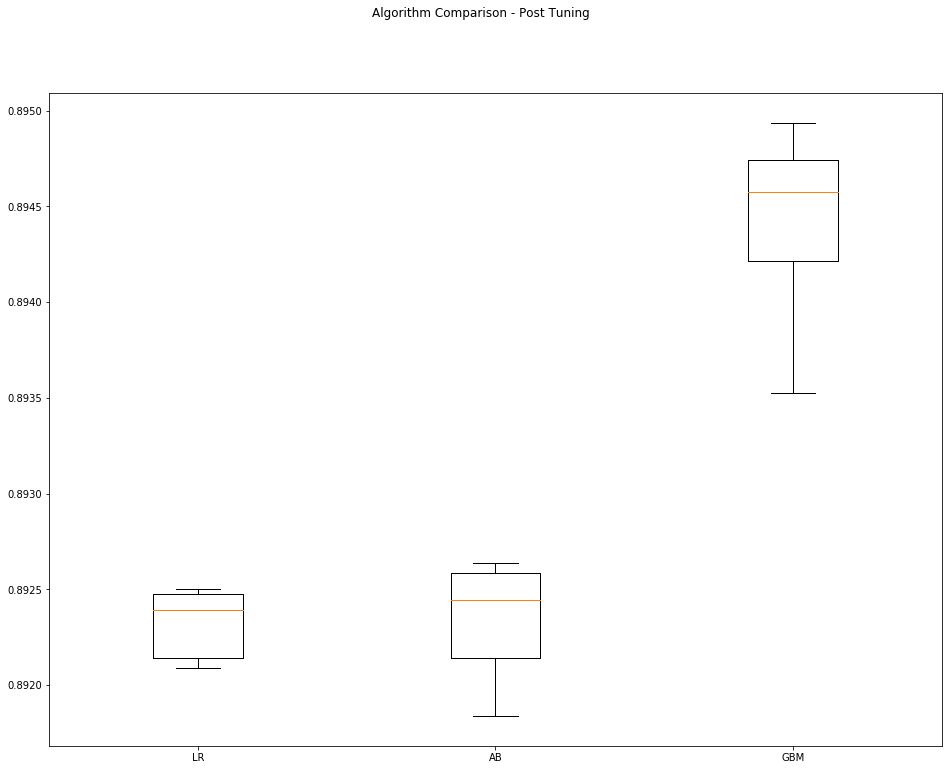

In [30]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [31]:
model = GradientBoostingClassifier(n_estimators=500, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8921817980758597
[[7774  210]
 [ 765  294]]
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      7984
          1       0.58      0.28      0.38      1059

avg / total       0.87      0.89      0.87      9043



### 6.b) Create standalone model on entire training dataset

In [32]:
startTimeModule = datetime.now()
finalModel = GradientBoostingClassifier(n_estimators=500)
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:24.657151


### 6.c) Save model for later use

In [33]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 1:28:12.994823
